# Analysis of Vehicle Insurance Data

### Aim of this analysis is to help insurance companies predict whether a customer would be interested in their vehicle insurance plan by analysizing patterns in past data

For this analysis we use data from source : "https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction"

### 1. Data Description

Data provided is of
- demographics (gender, age, region code type)
- Vehicles (Vehicle Age, Damage)
- Policy (Premium, sourcing channel)

In [26]:
# Importing All Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import minmax_scaling

In [27]:
# Importing Data
df_path = "train.csv" 
df = pd.read_csv(df_path)

In [28]:
# Metadata
print('Total Records in File: '+ format(df.shape[0]) +'\nTotal features: '+ format(df.shape[1]))

Total Records in File: 381109
Total features: 12


In [29]:
# Data Statistics
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [30]:
# Display Data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### 2. Data Cleaning

In [31]:
# Checking numeric and categorical fields
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

In [32]:
# Numeric Fields
NumericVariables

['id',
 'Age',
 'Driving_License',
 'Previously_Insured',
 'Vintage',
 'Response',
 'Region_Code',
 'Annual_Premium',
 'Policy_Sales_Channel']

In [33]:
# Checking for missing values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [34]:
# Checking for duplicates
df.duplicated().sum()

0

In [35]:
# Checking for duplicates
df.duplicated().sum()

0

All categorical fields will need to be encoded to use in any machine learning algorithm.

In [36]:
vehicle_age_categories = df.Vehicle_Age.unique()
vehicle_age_categories

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

Values in categorical fields
   - Gender(Male/Female)
   - Vehicle_Damage(Yes/No)
   - Vehicle_Age(>2 Years/1-2 Year/<1 Year)

In [37]:
# Manual Encoding for Vehicle_Age
Vehicle_Age_map  = {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}

df['Vehicle_Age'] = df['Vehicle_Age'].map(Vehicle_Age_map)
df=df.set_index("id")

C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

In [38]:
# Data Display after Encoding
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0


### 3. Data Visualization

We are analyzing data to see if the customers would be interested in buying the insurance. So, we are interested in the _'Response variable'_ which will be our dependent variable in this case

In [39]:
# Depandant Variable
y = df['Response']

To check for dependancy, we will find correlations among data points. For which we will use a heatmap with spearman correlation. But before that let us create some dummy data.

In [40]:
# Creating Dummy Data
df_dummy = pd.get_dummies(df[['Vehicle_Damage']], columns=['Vehicle_Damage'])
df_numeric = df[NumericVariables]
df_final = pd.merge(df_numeric,df_dummy,on='id')
df_rest = df['Gender']
df_final = pd.merge(df_final, df_rest, on='id')

response = ['Response']
VariablesNoTarget = [x for x in df_final.columns if x not in response]
print("Dummy transformation was successful")
df

Dummy transformation was successful


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381105,Male,74,1,26.0,1,1,No,30170.0,26.0,88,0
381106,Male,30,1,37.0,1,0,No,40016.0,152.0,131,0
381107,Male,21,1,30.0,1,0,No,35118.0,160.0,161,0


Let us also encode gender field. We'll use OneHotEncoder for this.

In [41]:
# OneHot Encoder
ohe = OneHotEncoder(handle_unknown='ignore')
df_final['Gender'] = ohe.fit_transform(df_final[['Gender']]).toarray() 
ohe.fit(df_final[['Gender']])
df_final

,Age,Driving_License,Previously_Insured,Vehicle_Age,Vintage,Response,Region_Code,Annual_Premium,Policy_Sales_Channel,Vehicle_Damage_No,Vehicle_Damage_Yes,Gender
id,,,,,,,,,,,,
1,44,1,0,2,217,1,28.0,40454.0,26.0,0,1,0.0
2,76,1,0,1,183,0,3.0,33536.0,26.0,1,0,0.0
3,47,1,0,2,27,1,28.0,38294.0,26.0,0,1,0.0
4,21,1,1,0,203,0,11.0,28619.0,152.0,1,0,0.0
5,29,1,1,0,39,0,41.0,27496.0,152.0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381105,74,1,1,1,88,0,26.0,30170.0,26.0,1,0,0.0
381106,30,1,1,0,131,0,37.0,40016.0,152.0,1,0,0.0
381107,21,1,1,0,161,0,30.0,35118.0,160.0,1,0,0.0


Now, df_final will be our dataframe for preprocessing operations.

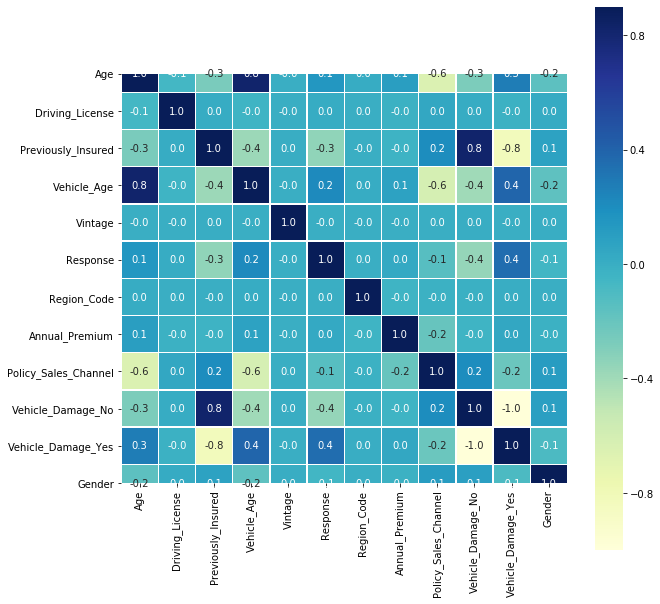

In [42]:
# Heatmap
SpearmanCorr = df_final.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

From the following data we can see 
- age is strongly correalted with vehicle_age
- age with sales channel
- previously insured is correlated with age and vehicle age
- previously insured with vehicle damage
- vehicle age and policy sales channel

Response is correlated with Vehicle_Age, Vehicle_Damage and Previously_Insured
So, let's create our independent variables.

In [43]:
# Independant Variables
x=df[['Vehicle_Age','Vehicle_Damage','Previously_Insured']]

Bar Chart to show insurance behaviour by gender

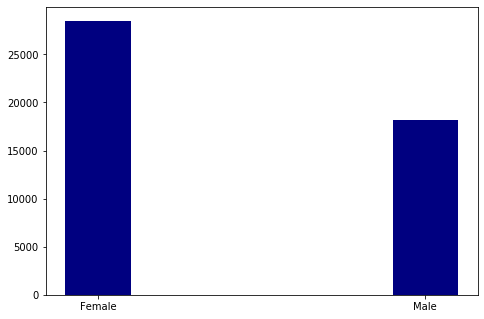

In [44]:
# Barchart
data = df_final.groupby('Gender')['Response'].sum()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['Female','Male']
data = [data[0],data[1]]

ax.bar(label,data,0.2, color='navy')
plt.show()

<div class="alert alert-block alert-success">
    <i>This shows that females responded to the insurance plans more favourably than males.</i>
</div>

Pie Chart to show the percentages of vehicle ages that make up our data

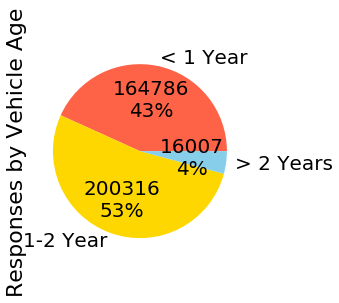

In [57]:
#Pie Chart
def label_function(val):
    return f'{val / 100 * len(df_final):.0f}\n{val:.0f}%'

fig, ax1= plt.subplots()
df_final.groupby('Vehicle_Age').size().plot(kind='pie', autopct=label_function, labels = vehicle_age_categories[::-1], textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)

ax1.set_ylabel('Responses by Vehicle Age', size=22)
plt.show()

# data = df_final.groupby('Vehicle_Age')['Response'].sum()
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# label = vehicle_age_categories[::-1]
# data = [data[0],data[1],data[2]]

# ax.bar(label,data,0.2, color='navy')
# plt.show()

<div class="alert alert-block alert-success">
<i>This shows that the insurance plans were pitched least to people with vehicles more than 2 years of age.</i>
</div>

### 4. Data Transformation

In [58]:
#Standard Scaler
scaler = StandardScaler()
df_final = scaler.fit_transform(df_final)

In [59]:
df_final

array([[ 0.33377727,  0.04620794, -0.91963797, ..., -0.99029399,
         0.99029399, -0.92154476],
       [ 2.39675074,  0.04620794, -0.91963797, ...,  1.00980114,
        -1.00980114, -0.92154476],
       [ 0.52718104,  0.04620794, -0.91963797, ..., -0.99029399,
         0.99029399, -0.92154476],
       ...,
       [-1.14898491,  0.04620794,  1.08738442, ...,  1.00980114,
        -1.00980114, -0.92154476],
       [ 1.88100737,  0.04620794, -0.91963797, ..., -0.99029399,
         0.99029399,  1.08513449],
       [ 0.46271311,  0.04620794, -0.91963797, ...,  1.00980114,
        -1.00980114, -0.92154476]])

### 5. Data Splitting

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2,random_state=10)

In [61]:
X_train

,Vehicle_Age,Vehicle_Damage,Previously_Insured
id,,,
176112,0,No,1
347648,1,Yes,0
128887,2,Yes,0
316970,1,Yes,0
208657,1,No,0
...,...,...,...
105596,2,Yes,0
93554,1,No,1
356880,1,Yes,0
